In [3]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import json
import pickle

import matplotlib
%matplotlib inline


In [4]:
std=pd.read_csv(r"Student_Performance.csv")
std

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [5]:
std.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [6]:
std.rename(columns={'Hours Studied': 'hours_studied'}, inplace=True)

In [7]:
std.rename(columns={'Previous Scores': 'previous_score'}, inplace=True)

In [8]:
std.rename(columns={'Extracurricular Activities': 'extra_act'}, inplace=True)

In [9]:
std.rename(columns={'Sleep Hours': 'sleep_hours'}, inplace=True)

In [10]:
std.rename(columns={'Sample Question Papers Practiced':'sample_paper'}, inplace=True)

In [11]:
std

,hours_studied,previous_score,extra_act,sleep_hours,sample_paper,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [12]:
std.isna().sum()

hours_studied        0
previous_score       0
extra_act            0
sleep_hours          0
sample_paper         0
Performance Index    0
dtype: int64

In [13]:
std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hours_studied      10000 non-null  int64  
 1   previous_score     10000 non-null  int64  
 2   extra_act          10000 non-null  object 
 3   sleep_hours        10000 non-null  int64  
 4   sample_paper       10000 non-null  int64  
 5   Performance Index  10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


#### hours studied

In [15]:
std['hours_studied'].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9], dtype=int64)

In [16]:
std['hours_studied'].nunique()

9

In [17]:
std['hours_studied'].value_counts()

hours_studied
1    1152
6    1133
7    1129
3    1119
9    1115
5    1094
8    1088
4    1085
2    1085
Name: count, dtype: int64

<Axes: >

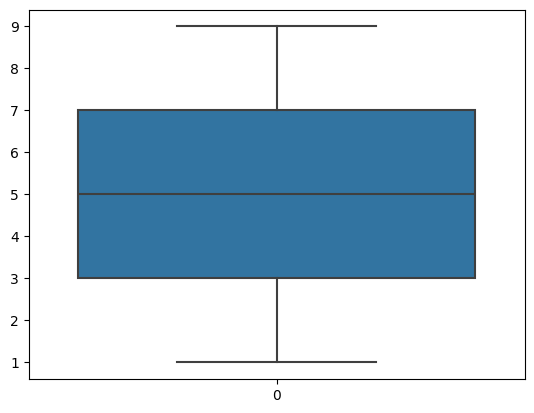

In [18]:
sns.boxplot(std['hours_studied'])

#### Previous Scores

In [20]:
std['previous_score'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: previous_score
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.3 KB


In [21]:
std['previous_score'].value_counts().sort_values()

previous_score
50    123
51    140
76    142
74    143
55    144
64    147
72    148
94    148
82    148
68    153
80    153
69    153
45    154
98    158
71    159
99    159
96    159
85    159
81    161
86    162
46    163
63    163
59    163
88    164
78    165
61    165
73    166
43    167
67    168
41    169
95    169
44    170
48    170
42    171
90    172
92    172
47    172
93    172
70    172
75    172
83    173
40    173
79    174
97    174
49    175
66    175
65    175
91    175
84    175
57    176
58    176
52    176
77    181
53    181
60    181
89    182
62    184
56    192
87    208
54    216
Name: count, dtype: int64

<Axes: >

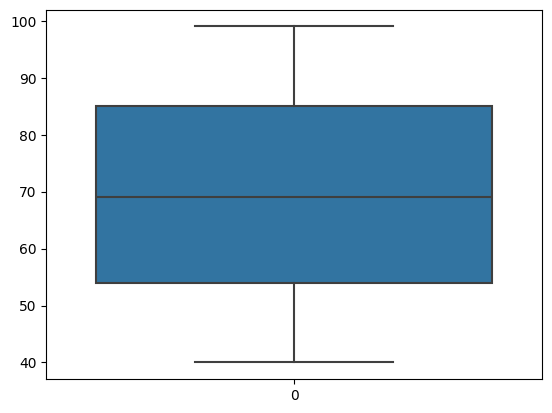

In [22]:
sns.boxplot(std['previous_score'])

#### Extracurricular Activities

In [24]:
std['extra_act'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: extra_act
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


In [25]:
std['extra_act'].isna().sum()

0

In [26]:
std['extra_act'].value_counts().to_dict()

{'No': 5052, 'Yes': 4948}

In [27]:
import numpy as np

unique_values = np.unique(std['extra_act'])
unique_dict = dict(enumerate(unique_values))
unique_dict

{0: 'No', 1: 'Yes'}

In [28]:
std['extra_act'].replace({'No':0, 'Yes':1},inplace=True)

In [29]:
std

,hours_studied,previous_score,extra_act,sleep_hours,sample_paper,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


#### Sleep Hours

In [31]:
std['sleep_hours'].unique()

array([9, 4, 7, 5, 8, 6], dtype=int64)

In [32]:
std['sleep_hours'].isna().sum()

0

<Axes: xlabel='sleep_hours', ylabel='Density'>

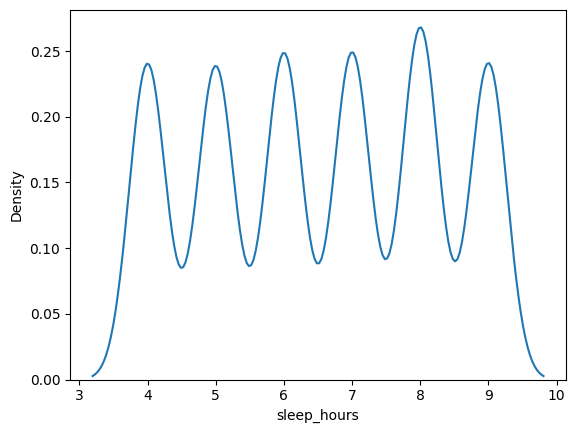

In [33]:
sns.kdeplot(std['sleep_hours'])

<Axes: >

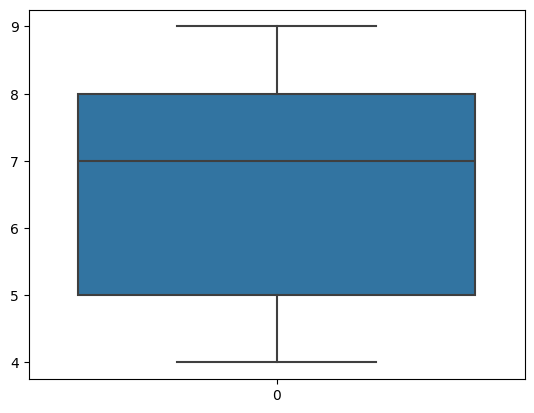

In [34]:
sns.boxplot(std['sleep_hours'])

#### Sample Question Papers Practiced

In [36]:
std['sample_paper'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: sample_paper
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.3 KB


In [37]:
std['sample_paper'].isna().sum()

0

<Axes: >

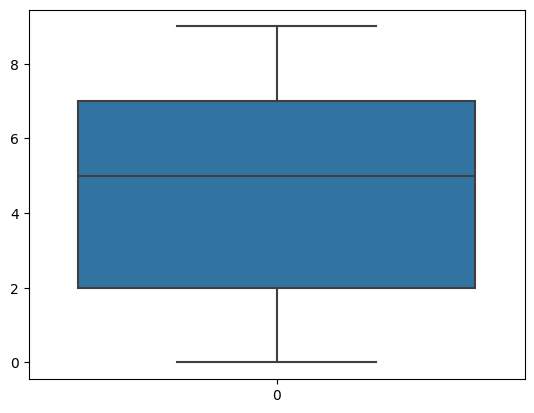

In [38]:
sns.boxplot(std['sample_paper'])

In [39]:
x=std.drop('Performance Index', axis=1)
y=std['Performance Index']

In [40]:
x

,hours_studied,previous_score,extra_act,sleep_hours,sample_paper
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [41]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=23)

In [43]:
linear_model=LinearRegression()

In [44]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [45]:
def evalution(string, model,ind_var,y_act):
    print(string.center(50,'*'))

    pred=model.predict(ind_var)

    mse=mean_squared_error(y_act,pred)
    print('MSE:', mse)

    rmse=np.sqrt(mse)
    print('rmse:',rmse)

    mae=mean_absolute_error(y_act,pred)
    print('mae:',mae)

    R2_score=r2_score(y_act,pred)
    print('R2_score:',R2_score)

    adj_r2=1-(((1-R2_score)*(ind_var.shape[0]-1))/(ind_var.shape[0]-ind_var.shape[1]-1))
    print('Adj_r2_score:',adj_r2)

evalution('Test Data Evalution',linear_model,x_test,y_test)
print()
evalution('Train Data Evalution',linear_model,x_train,y_train)
          

***************Test Data Evalution****************
MSE: 3.995277681013037
rmse: 1.998819071605291
mae: 1.5808462595725916
R2_score: 0.9889977346766988
Adj_r2_score: 0.9889793608201135

***************Train Data Evalution***************
MSE: 4.219451141744732
rmse: 2.0541302640642662
mae: 1.633320440078605
R2_score: 0.9886454469649693
Adj_r2_score: 0.9886373296122133


#### testing the row

In [47]:
x.head(1).T

,0
hours_studied,7
previous_score,99
extra_act,1
sleep_hours,9
sample_paper,1


In [48]:
x.head(1).values

array([[ 7, 99,  1,  9,  1]], dtype=int64)

In [49]:
test_array=x.head(1).values
test_array

array([[ 7, 99,  1,  9,  1]], dtype=int64)

In [50]:
linear_model.predict(test_array)

array([91.82630783])

In [51]:
project_data = {'extra_act':{'no':0,'yes':1}}
project_data

{'extra_act': {'no': 0, 'yes': 1}}

In [52]:
hours_studied = 7
previous_score = 99
extra_act = 'yes'
sleep_hours = 9
sample_paper = 1

In [53]:
x.shape[1]

5

In [54]:
test_array=np.zeros(x.shape[1])
test_array[0] = hours_studied
test_array[1] = previous_score
test_array[2] = project_data['extra_act'][extra_act]
test_array[3] = sleep_hours
test_array[4] = sample_paper
test_array

array([ 7., 99.,  1.,  9.,  1.])

In [55]:
result=linear_model.predict([test_array])[0]
print('The Student Performance is:',round(result,2))

The Student Performance is: 91.83


In [56]:
project_data['extra_act'][extra_act]

1

#### saving file to json and Pickel

In [58]:
with open('Linear_model.pkl','wb')as f:
    pickle.dump(linear_model,f)

In [59]:
with open('project_data.json','w') as f:
    json.dump(project_data,f)

In [60]:
import utils

ModuleNotFoundError: No module named 'config'